# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
#matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# Combining all the above stundents 
def preprocess_text_col(text_col):
    
    from tqdm import tqdm_notebook
    preprocessed_essays = []
    
    # tqdm is for printing the status bar
    for sentence in tqdm_notebook(text_col.values):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    
    return preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

## 1.5 Preparing data for models

In [14]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

In [15]:
# We use count vectorizer to convert the values into one.
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

def vect_cat_col(category):
    
    my_counter = Counter()
    for word in category.values:
        my_counter.update(word.split())

    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

    return sorted_cat_dict

In [16]:
#Eliminate NaNs from teacher_prefix column, as they will cause errors when splitting words during preprocessing.
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('')

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Using Pretrained Models: Avg W2V

In [17]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm_notebook

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm_notebook(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [18]:
def apply_avgw2v(preprocessed_essays,preprocessed_titles,model):
    
    
    words = []
    for i in preprocessed_essays:
        words.extend(i.split(' '))

    for i in preprocessed_titles:
        words.extend(i.split(' '))
    print("all the words in the corpus", len(words))
    words = set(words)
    print("the unique words in the corpus", len(words))

    inter_words = set(model.keys()).intersection(words)
    print("The number of words that are present in both glove vectors and our coupus", \
          len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

    words_courpus = {}
    words_glove = set(model.keys())
    for i in words:
        if i in words_glove:
            words_courpus[i] = model[i]
    print("word 2 vec length", len(words_courpus))


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

    import pickle
    with open('glove_vectors', 'wb') as f:
        pickle.dump(words_courpus, f)


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
    # make sure you have the glove_vectors file

    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())

    # average Word2Vec
    # compute average essay word2vec for each review.
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    # average Word2Vec
    # compute average project title word2vec for each review.
    avg_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/titles
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_titles_vectors.append(vector)
    return avg_w2v_vectors, avg_w2v_titles_vectors

#### 1.5.2.2 Using Pretrained Models: TFIDF weighted W2V

In [19]:
def apply_tfidfw2v(preprocessed_essays, preprocessed_titles):
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(preprocessed_essays)
    essays_vocab = tfidf_model.vocabulary_
    
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
        
    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted Word2Vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
    #TFIDF-weighted Word2Vec for titles.
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(preprocessed_titles)
    titles_vocab = tfidf_model.vocabulary_
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted word2vec for each review.
    tfidf_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_titles_vectors.append(vector)
    return tfidf_w2v_vectors, tfidf_w2v_titles_vectors, essays_vocab, titles_vocab

In [20]:
def apply_tfidfw2v_vocab(preprocessed_essays, preprocessed_titles, essays_vocab, titles_vocab):
    tfidf_model = TfidfVectorizer(vocabulary = essays_vocab)
    tfidf_model.fit(preprocessed_essays)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
        
    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted Word2Vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
    #TFIDF-weighted Word2Vec for titles.
    tfidf_model = TfidfVectorizer(vocabulary = titles_vocab)
    tfidf_model.fit(preprocessed_titles)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted word2vec for each review.
    tfidf_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_titles_vectors.append(vector)
    return tfidf_w2v_vectors, tfidf_w2v_titles_vectors

### 1.5.3 Vectorizing Numerical features

In [21]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [22]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
from sklearn.preprocessing import normalize

# price_normalized = normalize(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1) or array.reshape(1, -1)

def vect_num_col(numerical_column):
    col_normalized = normalize(numerical_column.values.reshape(1,-1))
    return col_normalized

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [23]:
y = project_data['project_is_approved']

#Split dataset by time to get test, CV, and train data.
#Source: https://stackoverflow.com/questions/39717090/scikit-learn-split-train-test-for-series
#Since the dataframe is already sorted by date, there is no need to sort by date again.

n = project_data.shape[0]
train_size = 0.6
cv_size = 0.2

train_data = project_data.iloc[:int(n * train_size)]
cv_data = project_data.iloc[int(n * (train_size)):int(n * (train_size + cv_size))]
test_data = project_data.iloc[int(n * (train_size + cv_size)):]
y_train = y.iloc[:int(n * train_size)]
y_cv = y.iloc[int(n * (train_size)):int(n * (train_size + cv_size))]
y_test = y.iloc[int(n * (train_size + cv_size)):]
print(train_data.shape)
print(cv_data.shape)
print(test_data.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(65548, 20)
(21850, 20)
(21850, 20)
(65548,)
(21850,)
(21850,)


<h2>2.2 Make Data Model Ready: preprocess essays</h2>

In [24]:
#Train Data
preprocessed_essays_train=preprocess_text_col(train_data['essay'])

#CV Data
preprocessed_essays_cv=preprocess_text_col(cv_data['essay'])
    
#Test Data
preprocessed_essays_test=preprocess_text_col(test_data['essay'])

<h2>2.3 Make Data Model Ready: preprocess titles</h2>

In [25]:
#Train Data
preprocessed_titles_train=preprocess_text_col(train_data['project_title'])

#CV Data
preprocessed_titles_cv=preprocess_text_col(cv_data['project_title'])
    
#Test Data
preprocessed_titles_test=preprocess_text_col(test_data['project_title'])

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [26]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = vect_num_col(train_data['teacher_number_of_previously_posted_projects'])
price_norm = vect_num_col(train_data['price'])

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

vectorizer = CountVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)

vectorizer_titles = CountVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [27]:
#Preprocessing cross-validation data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(cv_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(cv_data.price)

essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [28]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(test_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(test_data.price)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [29]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

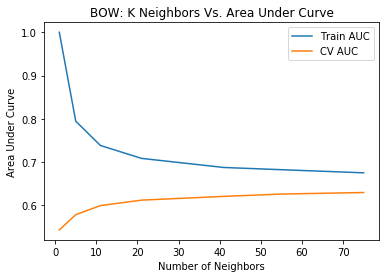

The optimal hyperparameter is: 75.


In [30]:
#Create and apply K Nearest-Neighbors.
#Find hyperparameter with highest AUC.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Source: appliedaicourse.com/course/applied-ai-course-online/lessons/code-samplecross-validation-knn-kfold-ipynb-and-knn-folder/
#Source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

neighbors = [1, 5, 11, 21, 41, 55, 75]
train_scores=[]
cv_scores=[]
x_train_csr = x_train_re.tocsr()
x_cv_csr = x_cv.tocsr()

for k in tqdm_notebook(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(x_train_re,y_train_re)
    
    y_train_pred=[]
    y_cv_pred=[]
    for i in range(0,x_train_re.shape[0],1000):
        y_train_pred.extend(knn.predict_proba(x_train_csr[i:i+1000])[:,1])
   
    for i in range(0, x_cv.shape[0],1000):
        y_cv_pred.extend(knn.predict_proba(x_cv_csr[i:i+1000])[:,1])
    
    train_score = roc_auc_score(y_train_re,y_train_pred)
    cv_score = roc_auc_score(y_cv,y_cv_pred)
    
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(neighbors, train_scores, label='Train AUC')
plt.plot(neighbors, cv_scores, label='CV AUC')
plt.title('BOW: K Neighbors Vs. Area Under Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under Curve')
plt.legend()
plt.show()
print("The optimal hyperparameter is: " + str(neighbors[cv_scores.index(cv_score)]) + ".")

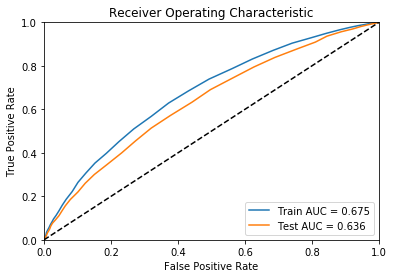

In [31]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

best_n = neighbors[cv_scores.index(cv_score)]

clf = KNeighborsClassifier(n_neighbors = best_n, n_jobs = -1)
clf.fit(x_train_re, y_train_re)

for i in range(0,x_train_re.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(x_train_csr[i:i+1000])[:,1])
    
for i in range(0,x_test.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(x_test_csr[i:i+1000])[:,1])

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_bow_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_bow_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_bow_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_bow_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

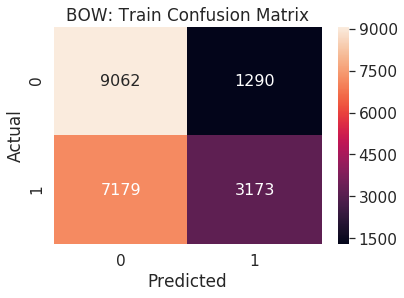

In [32]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('BOW: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

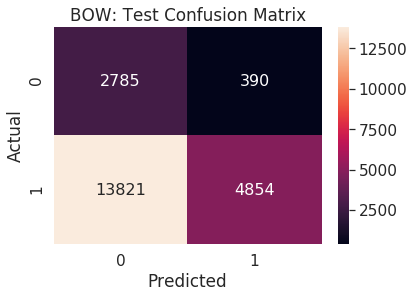

In [33]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('BOW: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [34]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = vect_num_col(train_data['teacher_number_of_previously_posted_projects'])
price_norm = vect_num_col(train_data['price'])

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.
vectorizer = TfidfVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_titles = TfidfVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [35]:
#Preprocessing cross-validation data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(cv_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(cv_data.price)

essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [36]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(test_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(test_data.price)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [37]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
rus = RandomUnderSampler(random_state=0)

#Reset y_train to what it was before balancing for prior models.
y_train = y.iloc[:int(n * train_size)]

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

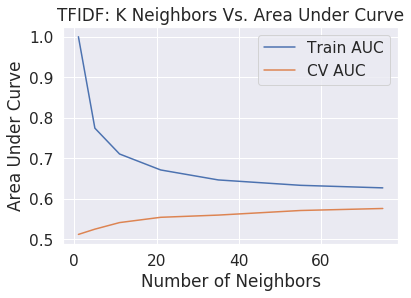

The optimal hyperparameter is: 75.


In [38]:
#Create and apply K Nearest-Neighbors.
#Find hyperparameter with highest AUC.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Source: appliedaicourse.com/course/applied-ai-course-online/lessons/code-samplecross-validation-knn-kfold-ipynb-and-knn-folder/
#Source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

neighbors = [1, 5, 11, 21, 35, 55, 75]
train_scores=[]
cv_scores=[]
x_train_csr = x_train_re.tocsr()
x_cv_csr = x_cv.tocsr()

for k in tqdm_notebook(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(x_train_re,y_train_re)
    
    y_train_pred=[]
    y_cv_pred=[]
    for i in range(0,x_train_re.shape[0],1000):
        y_train_pred.extend(knn.predict_proba(x_train_csr[i:i+1000])[:,1])
   
    for i in range(0, x_cv.shape[0],1000):
        y_cv_pred.extend(knn.predict_proba(x_cv_csr[i:i+1000])[:,1])
    
    train_score = roc_auc_score(y_train_re,y_train_pred)
    cv_score = roc_auc_score(y_cv,y_cv_pred)
    
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(neighbors, train_scores, label='Train AUC')
plt.plot(neighbors, cv_scores, label='CV AUC')
plt.title('TFIDF: K Neighbors Vs. Area Under Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under Curve')
plt.legend()
plt.show()
print("The optimal hyperparameter is: " + str(neighbors[cv_scores.index(cv_score)]) + ".")

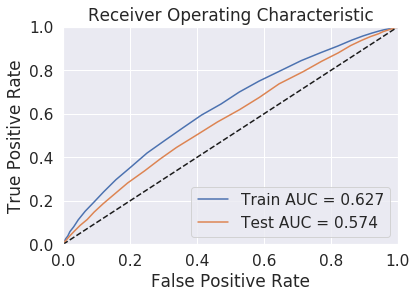

In [39]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

best_n = neighbors[cv_scores.index(cv_score)]

clf = KNeighborsClassifier(n_neighbors = best_n, n_jobs = -1)
clf.fit(x_train_re, y_train_re)

for i in range(0,x_train_re.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(x_train_csr[i:i+1000])[:,1])
    
for i in range(0,x_test.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(x_test_csr[i:i+1000])[:,1])

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidf_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidf_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidf_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidf_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

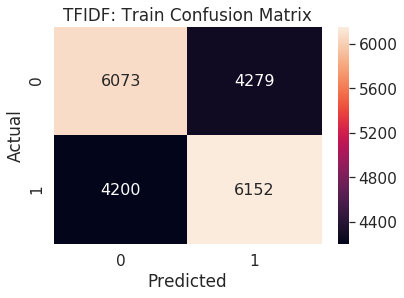

In [40]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

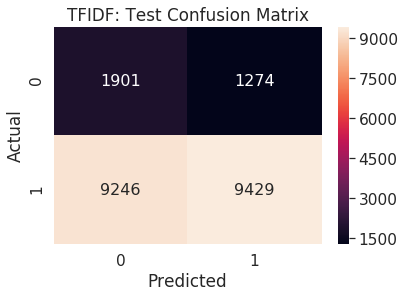

In [41]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [42]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = vect_num_col(train_data['teacher_number_of_previously_posted_projects'])
price_norm = vect_num_col(train_data['price'])

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

model = loadGloveModel('glove.42B.300d.txt')
essays, titles = apply_avgw2v(preprocessed_essays_train,preprocessed_titles_train,model)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

Loading Glove Model



Done. 1917495  words loaded!
all the words in the corpus 10249177
the unique words in the corpus 48020
The number of words that are present in both glove vectors and our coupus 43109 ( 89.773 %)
word 2 vec length 43109


100%|██████████| 65548/65548 [00:01<00:00, 59805.50it/s]


In [43]:
#Preprocessing cross-validation data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(cv_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(cv_data.price)

essays, titles = apply_avgw2v(preprocessed_essays_cv,preprocessed_titles_cv,model)


# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

all the words in the corpus 3375631
the unique words in the corpus 30697
The number of words that are present in both glove vectors and our coupus 28856 ( 94.003 %)
word 2 vec length 28856


100%|██████████| 21850/21850 [00:00<00:00, 57670.04it/s]


In [44]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(test_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(test_data.price)

essays, titles = apply_avgw2v(preprocessed_essays_test,preprocessed_titles_test, model)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

all the words in the corpus 3389605
the unique words in the corpus 30874
The number of words that are present in both glove vectors and our coupus 29260 ( 94.772 %)
word 2 vec length 29260


100%|██████████| 21850/21850 [00:00<00:00, 52142.55it/s]


In [45]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

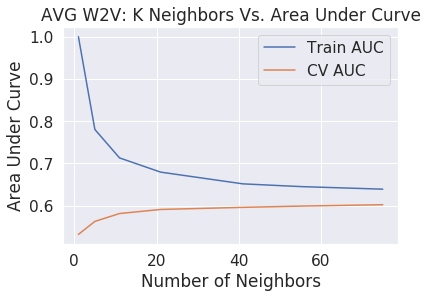

The optimal hyperparameter is: 75.


In [46]:
#Create and apply K Nearest-Neighbors.
#Find hyperparameter with highest AUC.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Source: appliedaicourse.com/course/applied-ai-course-online/lessons/code-samplecross-validation-knn-kfold-ipynb-and-knn-folder/
#Source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

neighbors = [1, 5, 11, 21, 41, 55, 75]
train_scores=[]
cv_scores=[]
x_train_csr = x_train_re.tocsr()
x_cv_csr = x_cv.tocsr()

for k in tqdm_notebook(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(x_train_re,y_train_re)
    
    y_train_pred=[]
    y_cv_pred=[]
    for i in range(0,x_train_re.shape[0],1000):
        y_train_pred.extend(knn.predict_proba(x_train_csr[i:i+1000])[:,1])
   
    for i in range(0, x_cv.shape[0],1000):
        y_cv_pred.extend(knn.predict_proba(x_cv_csr[i:i+1000])[:,1])
    
    train_score = roc_auc_score(y_train_re,y_train_pred)
    cv_score = roc_auc_score(y_cv,y_cv_pred)
    
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(neighbors, train_scores, label='Train AUC')
plt.plot(neighbors, cv_scores, label='CV AUC')
plt.title('AVG W2V: K Neighbors Vs. Area Under Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under Curve')
plt.legend()
plt.show()
print("The optimal hyperparameter is: " + str(neighbors[cv_scores.index(cv_score)]) + ".")

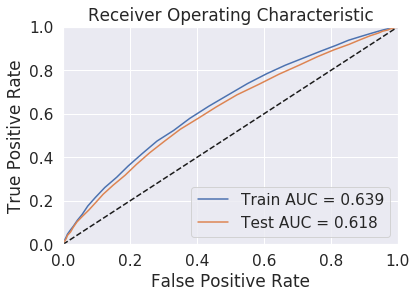

In [47]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

best_n = neighbors[cv_scores.index(cv_score)]

clf = KNeighborsClassifier(n_neighbors = best_n, n_jobs = -1)
clf.fit(x_train_re, y_train_re)

for i in range(0,x_train_re.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(x_train_csr[i:i+1000])[:,1])
    
for i in range(0,x_test.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(x_test_csr[i:i+1000])[:,1])

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_avgw2v_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_avgw2v_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_avgw2v_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_avgw2v_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

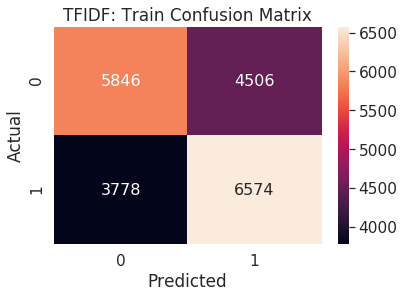

In [48]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

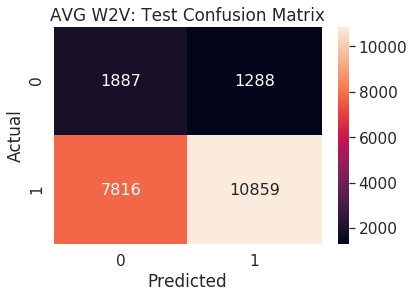

In [49]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('AVG W2V: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [50]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = vect_num_col(train_data['teacher_number_of_previously_posted_projects'])
price_norm = vect_num_col(train_data['price'])

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

essays, titles, essays_vocab, titles_vocab = apply_tfidfw2v(preprocessed_essays_train,preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

100%|██████████| 65548/65548 [00:02<00:00, 27231.04it/s]


In [51]:
#Preprocessing cross-validation data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(cv_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(cv_data.price)

essays, titles = apply_tfidfw2v_vocab(preprocessed_essays_cv, preprocessed_titles_cv, essays_vocab, titles_vocab)


# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

100%|██████████| 21850/21850 [00:00<00:00, 27298.74it/s]


In [52]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(test_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(test_data.price)

essays, titles = apply_tfidfw2v_vocab(preprocessed_essays_test, preprocessed_titles_test, essays_vocab, titles_vocab)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

100%|██████████| 21850/21850 [00:00<00:00, 28168.19it/s]


In [53]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

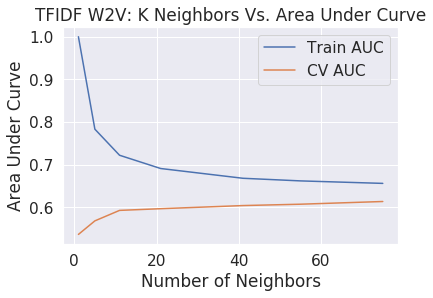

The optimal hyperparameter is: 75.


In [54]:
#Create and apply K Nearest-Neighbors.
#Find hyperparameter with highest AUC.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Source: appliedaicourse.com/course/applied-ai-course-online/lessons/code-samplecross-validation-knn-kfold-ipynb-and-knn-folder/
#Source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

neighbors = [1, 5, 11, 21, 41, 55, 75]
train_scores=[]
cv_scores=[]
x_train_csr = x_train_re.tocsr()
x_cv_csr = x_cv.tocsr()

for k in tqdm_notebook(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(x_train_re,y_train_re)
    
    y_train_pred=[]
    y_cv_pred=[]
    for i in range(0,x_train_re.shape[0],1000):
        y_train_pred.extend(knn.predict_proba(x_train_csr[i:i+1000])[:,1])
   
    for i in range(0, x_cv.shape[0],1000):
        y_cv_pred.extend(knn.predict_proba(x_cv_csr[i:i+1000])[:,1])
    
    train_score = roc_auc_score(y_train_re,y_train_pred)
    cv_score = roc_auc_score(y_cv,y_cv_pred)
    
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(neighbors, train_scores, label='Train AUC')
plt.plot(neighbors, cv_scores, label='CV AUC')
plt.title('TFIDF W2V: K Neighbors Vs. Area Under Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under Curve')
plt.legend()
plt.show()
print("The optimal hyperparameter is: " + str(neighbors[cv_scores.index(cv_score)]) + ".")

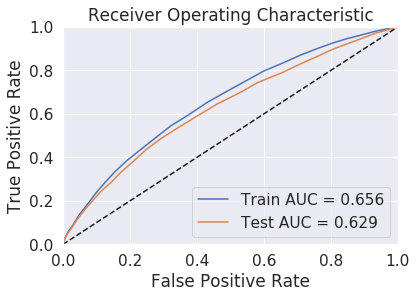

In [55]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

best_n = neighbors[cv_scores.index(cv_score)]

clf = KNeighborsClassifier(n_neighbors = best_n, n_jobs = -1)
clf.fit(x_train_re, y_train_re)

for i in range(0,x_train_re.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(x_train_csr[i:i+1000])[:,1])
    
for i in range(0,x_test.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(x_test_csr[i:i+1000])[:,1])

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidfw2v_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidfw2v_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidfw2v_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidfw2v_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

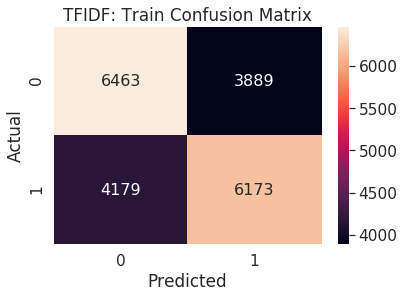

In [56]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

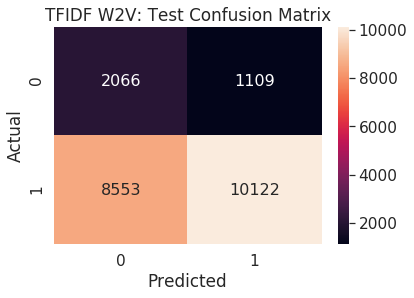

In [57]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF W2V: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [58]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = vect_num_col(train_data['teacher_number_of_previously_posted_projects'])
price_norm = vect_num_col(train_data['price'])

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.


vectorizer = TfidfVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_titles = TfidfVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [59]:
#Preprocessing cross-validation data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(cv_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(cv_data.price)

#Text data.
essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [60]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = vect_num_col(test_data.teacher_number_of_previously_posted_projects)
price_norm = vect_num_col(test_data.price)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm.T, price_norm.T, titles, essays))

In [61]:
from sklearn.feature_selection import SelectKBest, chi2
k_selector = SelectKBest(chi2, k=2000)
x_train = k_selector.fit_transform(x_train, y_train)
x_cv = k_selector.transform(x_cv)
x_test = k_selector.transform(x_test)

In [62]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

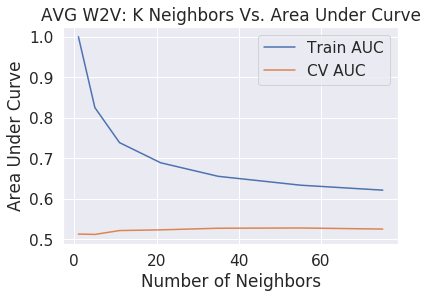

The optimal hyperparameter is: 75.


In [63]:
#Create and apply K Nearest-Neighbors.
#Find hyperparameter with highest AUC.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Source: appliedaicourse.com/course/applied-ai-course-online/lessons/code-samplecross-validation-knn-kfold-ipynb-and-knn-folder/
#Source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

neighbors = [1, 5, 11, 21, 35, 55, 75]
train_scores=[]
cv_scores=[]
x_train_csr = x_train_re.tocsr()
x_cv_csr = x_cv.tocsr()

for k in tqdm_notebook(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(x_train,y_train)
    
    y_train_pred=[]
    y_cv_pred=[]
    for i in range(0,x_train_re.shape[0],1000):
        y_train_pred.extend(knn.predict_proba(x_train_csr[i:i+1000])[:,1])
   
    for i in range(0, x_cv.shape[0],1000):
        y_cv_pred.extend(knn.predict_proba(x_cv_csr[i:i+1000])[:,1])
    
    train_score = roc_auc_score(y_train_re,y_train_pred)
    cv_score = roc_auc_score(y_cv,y_cv_pred)
    
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(neighbors, train_scores, label='Train AUC')
plt.plot(neighbors, cv_scores, label='CV AUC')
plt.title('AVG W2V: K Neighbors Vs. Area Under Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under Curve')
plt.legend()
plt.show()
print("The optimal hyperparameter is: " + str(neighbors[cv_scores.index(cv_score)]) + ".")

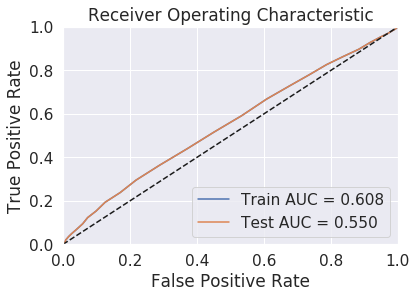

In [64]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

best_n = neighbors[cv_scores.index(cv_score)]

clf = KNeighborsClassifier(n_neighbors = best_n, n_jobs = -1)
clf.fit(x_train_re, y_train_re)

for i in range(0,x_train_re.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(x_train_csr[i:i+1000])[:,1])
    
for i in range(0,x_test.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(x_test_csr[i:i+1000])[:,1])

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidf2000_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidf2000_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidf2000_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidf2000_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidf2000_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

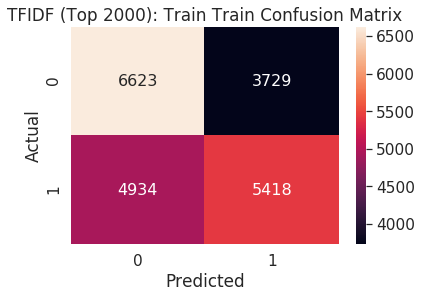

In [65]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF (Top 2000): Train Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

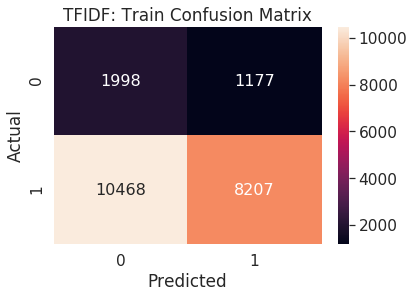

In [66]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

<h1>3. Conclusions</h1>

In [67]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparamter", "Train AUC", "Test AUC"]

x.add_row(["BOW", "K-Nearest Neighbor", 75, '%0.3f' % roc_auc_bow_train, '%0.3f' % roc_auc_tfidf_test])
x.add_row(["TFIDF", "K-Nearest Neighbor", 75, '%0.3f' % roc_auc_tfidf_train, '%0.3f' % roc_auc_tfidf_test])
x.add_row(["AVG W2V", "K-Nearest Neighbor", 75, '%0.3f' % roc_auc_avgw2v_train, '%0.3f' % roc_auc_avgw2v_test])
x.add_row(["TFIDF W2V", "K-Nearest Neighbor", 75, '%0.3f' % roc_auc_tfidfw2v_train, '%0.3f' % roc_auc_tfidfw2v_test])
x.add_row(["TFIDF - Top 2000 Features", "K-Nearest Neighbor", 75, '%0.3f' % roc_auc_tfidf2000_train, '%0.3f' % roc_auc_tfidf2000_test])

print(x)

+---------------------------+--------------------+---------------+-----------+----------+
|         Vectorizer        |       Model        | Hyperparamter | Train AUC | Test AUC |
+---------------------------+--------------------+---------------+-----------+----------+
|            BOW            | K-Nearest Neighbor |       75      |   0.675   |  0.574   |
|           TFIDF           | K-Nearest Neighbor |       75      |   0.627   |  0.574   |
|          AVG W2V          | K-Nearest Neighbor |       75      |   0.639   |  0.618   |
|         TFIDF W2V         | K-Nearest Neighbor |       75      |   0.656   |  0.629   |
| TFIDF - Top 2000 Features | K-Nearest Neighbor |       75      |   0.608   |  0.550   |
+---------------------------+--------------------+---------------+-----------+----------+


<h2>Summary</h2>

In this analysis, I reviewed KNN models for predicting whether a DonorsChoose project would be accepted.

Key Observations:

1. Each model performed best with the maximum K neighbors (75).
2. Among these models, TFIDF Word2Vec had the strongest performance in terms of test AUC.
3. The test AUC for all the models is relatively low (.55-.63). This suggests that the models are not great predictors of which project will be approved, suggesting that our features do not account for all the variation in project acceptance vs. rejection. For example, beyond specific words used, perhaps there are linguistic and grammatical reasons projects are rejected. In any case, a KNN model with this set of features seems to perform only slightly better than chance.
4. Limiting the analysis to the top 2000 features expedites performance time, yet reduces performance of TFIDF slightly, as expected.

Among the models tested, the model using TFIDF Word2Vec is the best predictor of which projects will be approved. However, due to a relatively low AUC, we should test other classification models' performance to see if a better model exists.